## <bold> Seive of Eratosthenes </bold>

<p> We can create a list of consecutive integers from 2 to ‘n’. </p>

<p>  <italic> Start with the prime number which is 2. Mark all of its multiple greater than 2 as composite (ie. 4, 6, 8, 10 and so on). Find the next number in the list that is not marked as composite. This is the next prime number. Repeat until all numbers up to ‘n’ have to be processed. </italic> </p>


In [6]:
import math

def find_all_primes(n):
    # Initialise with 1 (assuming all numbers are prime initially)
    prime = [1] * (n + 1)
    # 0 and 1 are not prime
    prime[0] = prime[1] = 0
    
    # Apply Sieve of Eratosthenes
    for i in range(2, int(math.sqrt(n) + 1)):
        if prime[i] == 1:
            for j in range(i*i, n+1, i):
                # Mark multiples of prime numbers as not prime
                prime[j] = 0
                
    prime_numbers = []
    for i in range(2, n+1):
        if prime[i] == 1:
            prime_numbers.append(i)
            
    return prime_numbers
            
            
print(find_all_primes(136))           

[2, 3, 5, 7, 11, 13, 17, 19, 23, 29, 31, 37, 41, 43, 47, 53, 59, 61, 67, 71, 73, 79, 83, 89, 97, 101, 103, 107, 109, 113, 127, 131]


## Prime Numbers in a given range : L-R

In [7]:
def find_primes_in_range(L, R):
    prime = [1] * (R + 1)
    prime[0] = prime[1] = 0
    
    for i in range(2, int(math.sqrt(R) + 1)):
        if prime[i] == 1:
            for j in range(i*i, R+1, i):
                prime[j] = 0
                
    prime_numbers = []
    for i in range(L, R+1):
        if prime[i] == 1:
            prime_numbers.append(i)
            
    return prime_numbers

find_primes_in_range(10, 50)

[11, 13, 17, 19, 23, 29, 31, 37, 41, 43, 47]

## Count prime number in a given range L-R

In [8]:
def count_primes_in_range(L, R):
    prime = [1] * (R + 1)
    prime[0] = prime[1] = 0
    
    for i in range(2, int(math.sqrt(R) + 1)):
        if prime[i] == 1:
            for j in range(i*i, R+1, i):
                prime[j] = 0
                
    count = 0
    for i in range(L, R+1):
        if prime[i] == 1:
            count += 1
            
    return count

<p> <strong > We can further reduce the time complexity of the previous algorithm by avoiding redundant counting of primes for each index. For each query, we need to continuously count the number of primes between the left and right endpoints. If we pre calculate the count of primes up to each index we can answer each query in constant time complexity. </strong> </p>

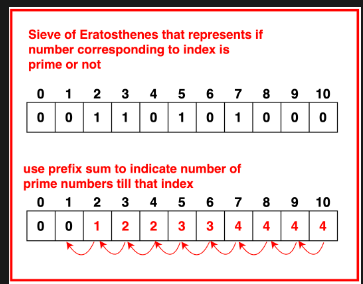


    1. Step 1:Create a Sieve of Eratosthenes up to the maximum range ie. 106 
    2. Step 2: Initialise an empty vector ans to store the counts of primes of each query.
    3. Step 3: After generating the Sieve, count the number of primes up to each index. Iterate through the Sieve and count the number of primes encountered so far.
        The Sieve now stores the number of prime numbers up to ‘n’ at that index.
    4. Step 4: Process each query in the queries input vector.
    
        1. Extract the left and right range points of the current query.
        2. Calculate the number of primes between the left and right endpoints by substracting the count of primes at index right from the count of primes at index l-1.
        3. Add this count to the answer vector.

    5. Step 5: Return the ans vector containing counts of primes for each query.
    


In [8]:
import math

def get_sieve(n):
    prime = [1]* (n + 1)
    prime[0] = prime[1] = 0

    for i in range(2, int(math.sqrt(n) + 1)):
        if prime[i] == 1:
            for j in range(i*i , n+1 , i):
                prime[j] = 0
    return prime


def count_primes(queries):
    prime = get_sieve(1000000)
    ans = []
    count = 0

    for i in range(2, len(prime)):
        count += prime[i]
        prime[i] = count

    for query in queries:
        l, r = query
        ans.append(prime[r] - prime[l-1])

    return ans


In [9]:
Q = 3
queries = [[3, 10], [8, 20], [1, 5]]
print("No. of Queries:", len(queries))
print("Queries:", end=" ")
for query in queries:
    print(f"({query[0]}, {query[1]})", end=" ")

result = count_primes(queries)

print("\nNumber of primes between the ranges:", end=" ")
for res in result:
    print(res, end=" ")
print()

No. of Queries: 3
Queries: (3, 10) (8, 20) (1, 5) 
Number of primes between the ranges: 3 4 3 
